In [1]:
import gymnasium
import pandas as pd

import gym_trading

In [2]:
def process_data(env):
    price = env.df.close
    
    # mask = list(range(0, -20, -1))  # negative indices look into the future, sanity checking
    mask = list(range(20))            # positive indices look into the past
    features = pd.concat(
        [
            (env.df.close.shift(mask[i]) - env.df.close.shift(mask[i + 1]))
            / (env.df.close.shift(mask[i]) + env.df.close.shift(mask[i + 1]))
            for i, _ in enumerate(mask[:-1])
        ],
        axis=1,
    ).fillna(0).to_numpy()

    return price, features

In [10]:
def env_fn():
    df = gym_trading.datasets.BITCOIN_USD_1H
    env = gym_trading.envs.TradingEnv(
        df=df,
        comission_fee=0.005,
        process_data=process_data,
        max_episode_steps=24*12,
    )
    return env

env = env_fn()
# env = gymnasium.vector.SyncVectorEnv([env_fn for _ in range(16)])


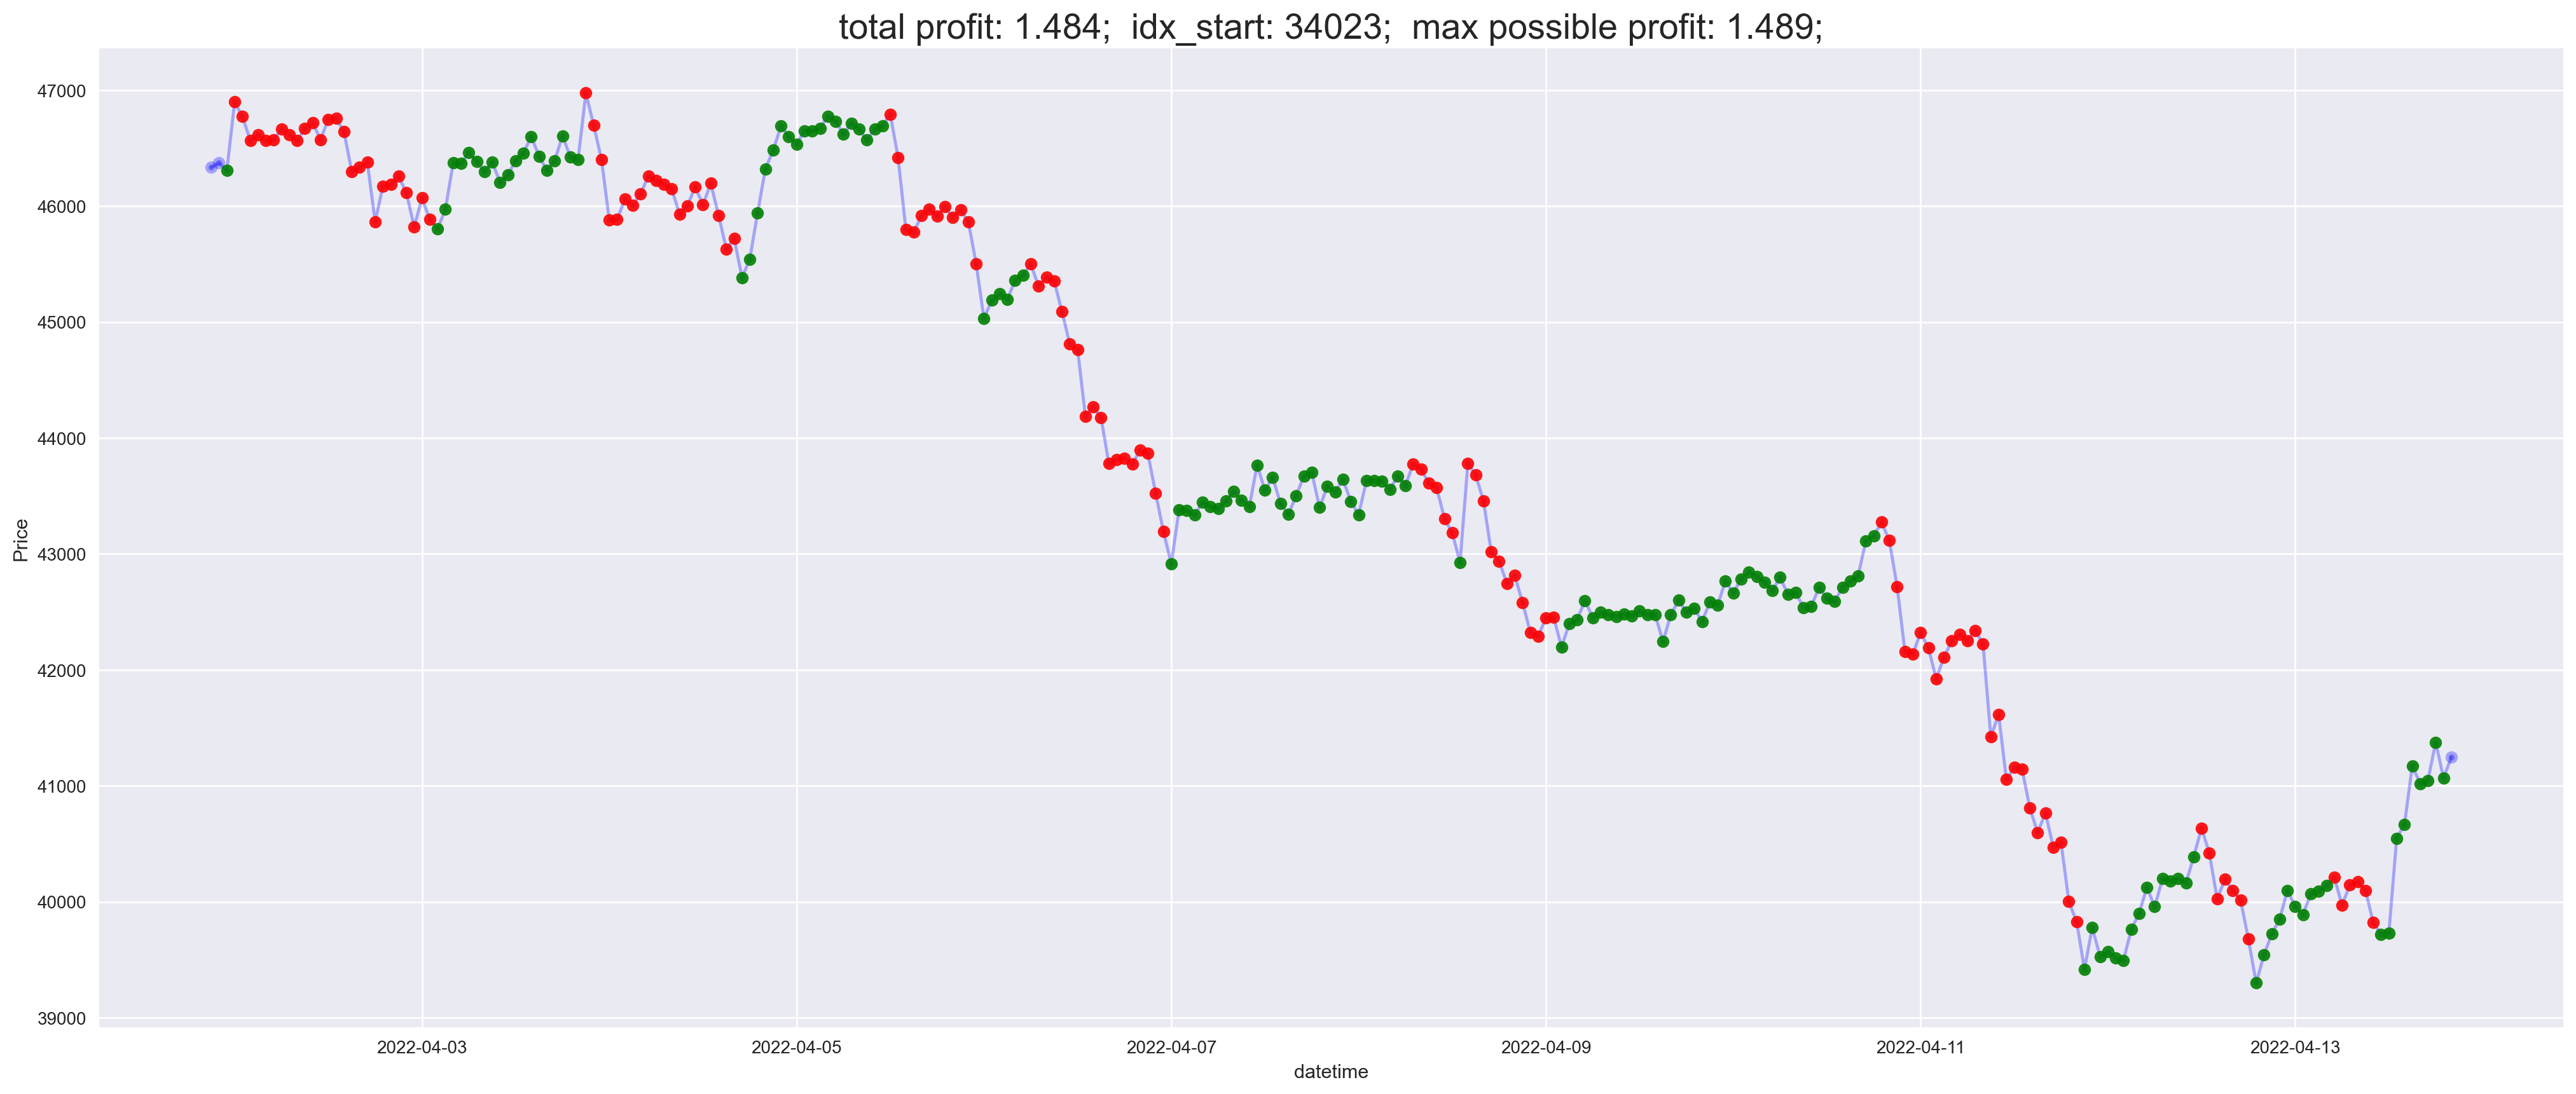

In [15]:
obs, _ = env.reset()
while True:
    # obs: dict[features: np.ndarray, price_change: [float], position: [int], time_left: [float]]
    # action = env.action_space.sample()
    action = env.get_optimal_action()
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break
env.render()